# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1GAWfaucw0yYWOvVFHCvPUAIe87sqRxAd)

![alt text](https://drive.google.com/uc?id=1zT5SjHQaN0LxV-aSXQuqHFlnTh4iHQmu)

![alt text](https://drive.google.com/uc?id=1e0ZdhUZ-uHYcER1QlgXECT8QqKS7Zq7W)

- Data source: https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation
- Clickable link for the full list of startups in AI medical imagery: https://research.aimultiple.com/looking-for-better-medical-imaging-for-early-diagnostic-and-monitoring-contact-the-leading-vendors-here/

![alt text](https://drive.google.com/uc?id=1l_L8fKJTubEuHl1hvsQgUHLQIW7ha8ua)

![alt text](https://drive.google.com/uc?id=1VzbRzkgsUCLB2gQab5324f6Wy756KtoU)

![alt text](https://drive.google.com/uc?id=1O0LFxybEkdp2wTPJN8PpPHtlJWB9Z0fn)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [4]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Navigate to My Drive directory to store the dataset
%cd /content/drive/MyDrive/colab proyects/Tumor_Segmentation_MRI


/content/drive/MyDrive/colab proyects/Tumor_Segmentation_MRI


In [ ]:
# data containing path to Brain MRI and their corresponding mask
'''
from glob import glob
mask_files = glob('./data/*/*_mask*')
train_files = [file.replace('_mask', '') for file in mask_files]
def label(mask):
    value = np.max(cv2.imread(mask))
    return '1' if value > 0 else '0'
brain_df = pd.DataFrame({"image_path": train_files,
                   "mask_path": mask_files,
                  "mask":[label(x) for x in mask_files]})
brain_df.to_csv('route_label.csv')
'''


'\nfrom glob import glob\nmask_files = glob(\'./data/*/*_mask*\')\ntrain_files = [file.replace(\'_mask\', \'\') for file in mask_files]\ndef label(mask):\n    value = np.max(cv2.imread(mask))\n    return \'1\' if value > 0 else \'0\'\nbrain_df = pd.DataFrame({"image_path": train_files,\n                   "mask_path": mask_files,\n                  "mask":[label(x) for x in mask_files]})\nbrain_df.to_csv(\'route_label.csv\')\n'

![alt text](https://drive.google.com/uc?id=1Surtfp9XVt-anBuK6g5g7IeU1yirVH_1)

In [7]:
brain_df=pd.read_csv('route_label.csv',index_col=0)
brain_df.head(10)

image_path  \
0  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
1  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
2  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
3  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
4  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
5  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
6  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
7  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
8  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
9  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   

                                           mask_path  mask  
0  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
1  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
2  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
3  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
4  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
5  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
6  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
7  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
8  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
9  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0

MINI CHALLENGE #1:
  - Do we have a balanced dataset?
  - How many samples are classified as 'healthy'?

In [ ]:
# Obtain the number of images with mask
brain_df['mask'].value_counts()

mask
0    2533
1    1366
Name: count, dtype: int64

# TASK #3: PERFORM DATA VISUALIZATION

In [ ]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

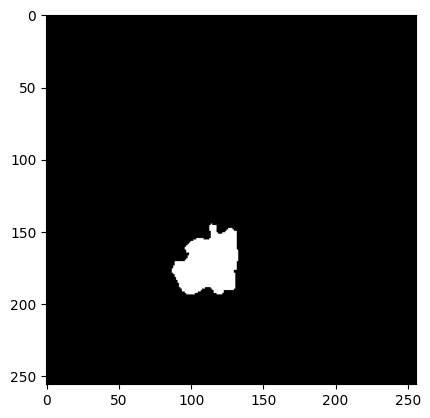

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[513]))

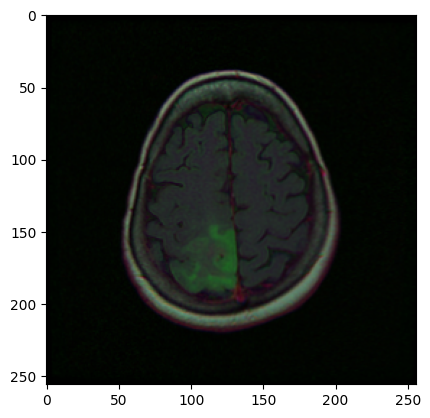

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[513]))

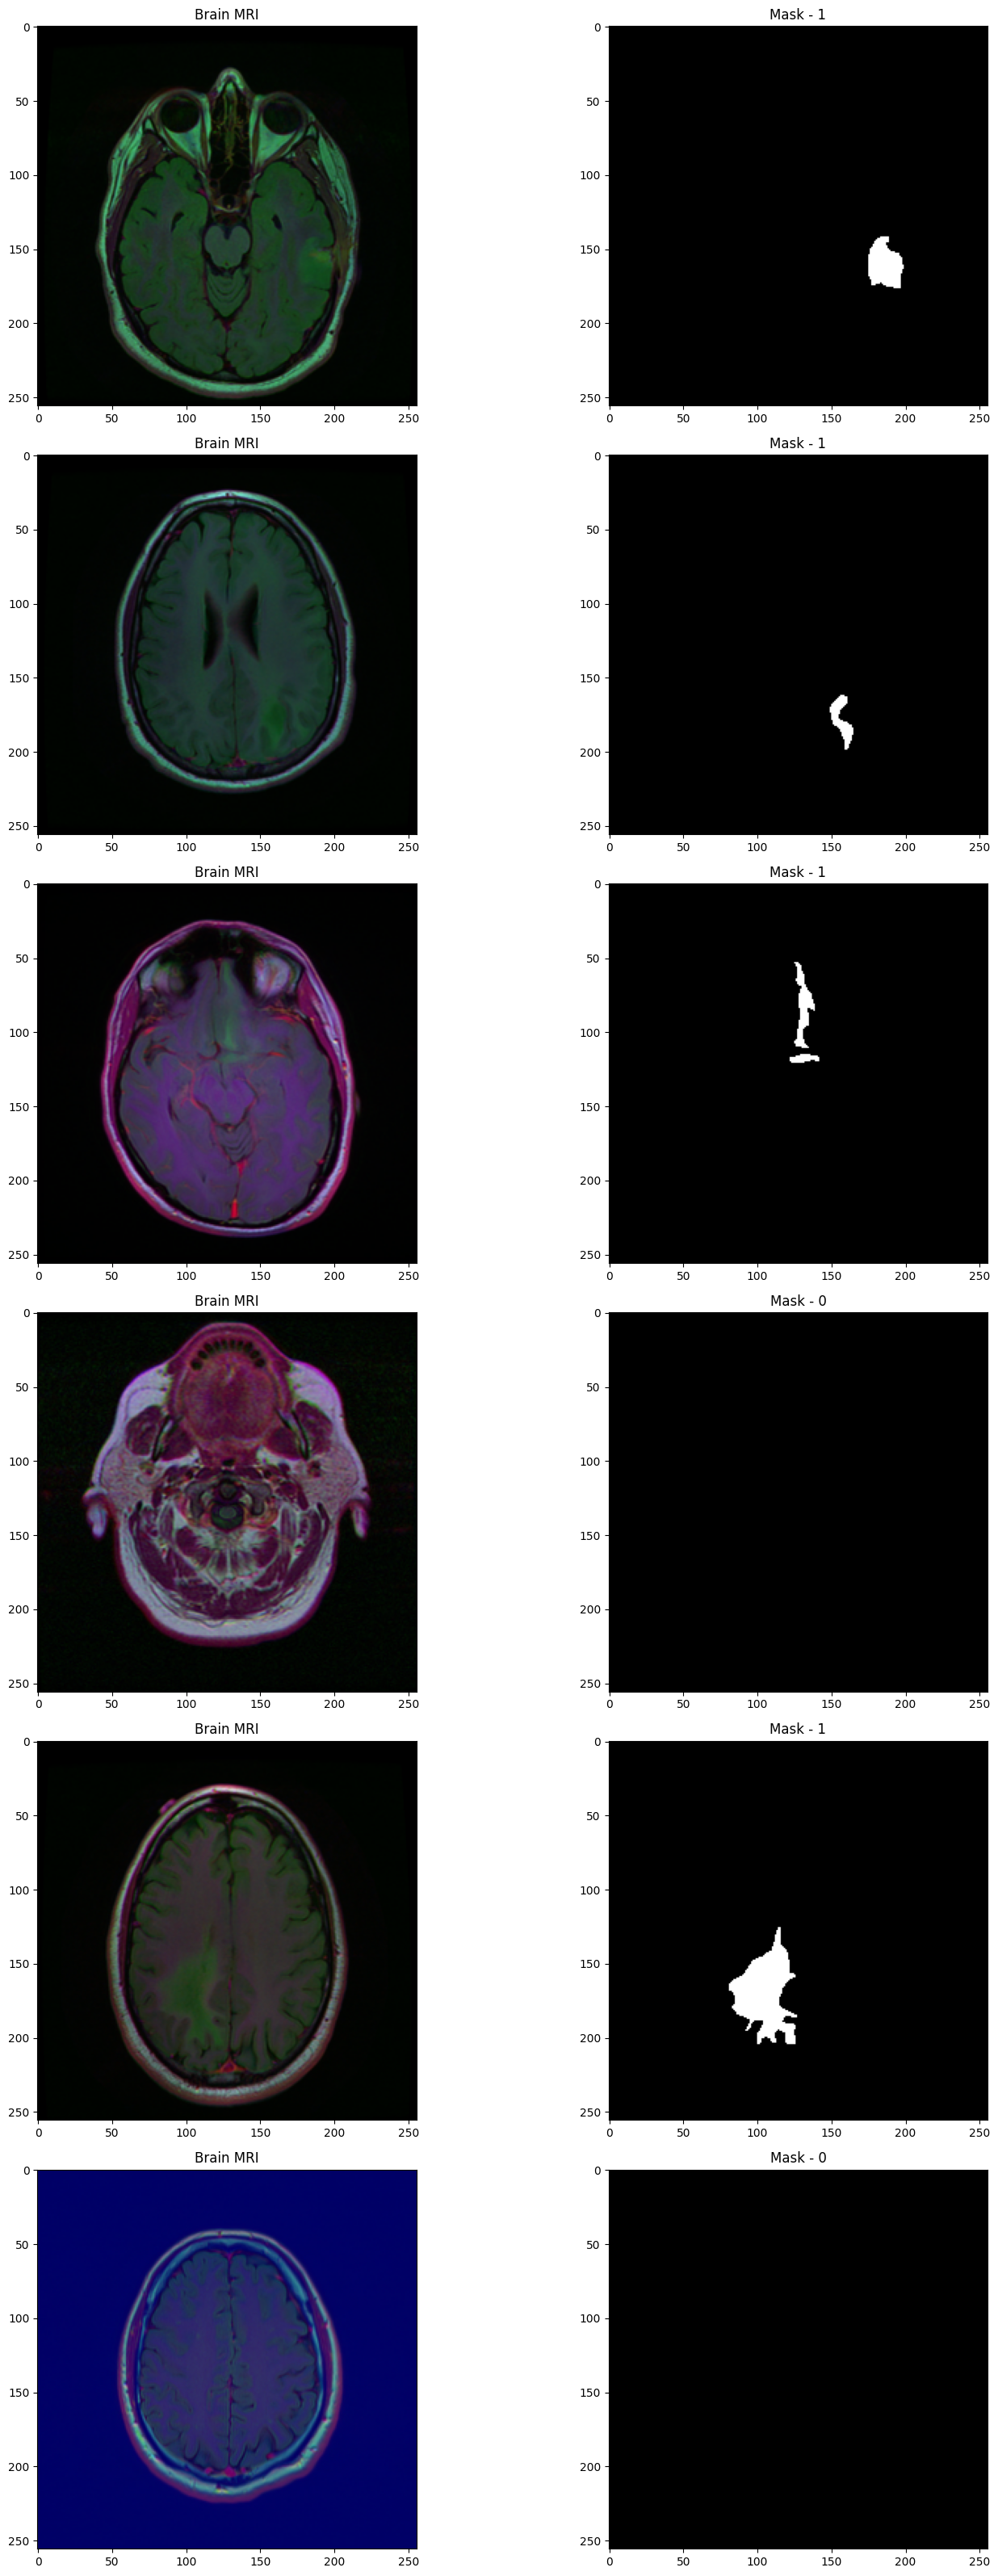

In [ ]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

In [ ]:
brain_df['mask'].value_counts()

mask
0    2533
1    1366
Name: count, dtype: int64

MINI CHALLENGE #2:
 - Plot 12 randomly selected (1) MRI scan images from only sick patients followed by (2) corresponding mask, (3) both MRI image and the corresponding mask (in red color) on top of each other

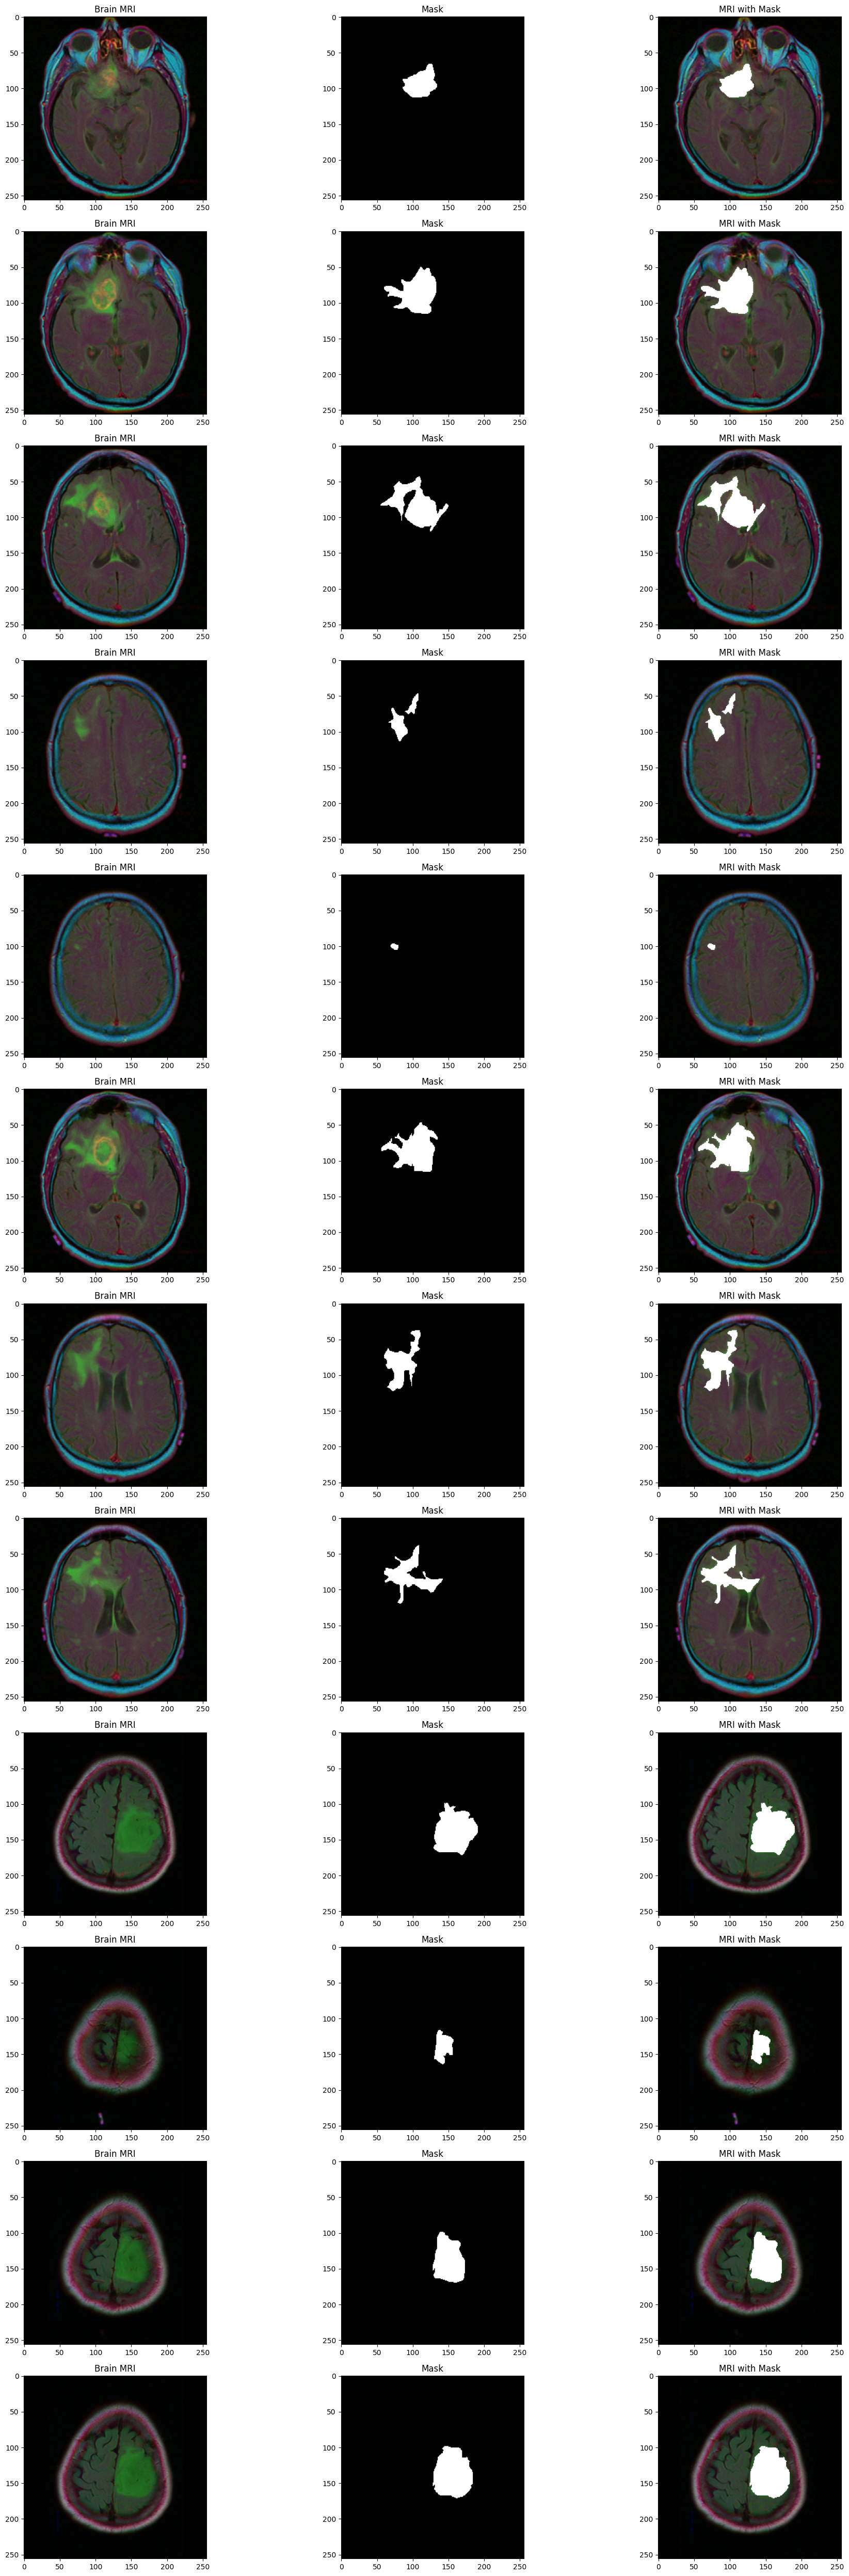

In [ ]:
# Advanced Visualization: visualize the MRI scans along with their mask on one image
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # read the images
    img = io.imread(brain_df.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # obtain the mask for the image
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # replace the values in the image with red color (255,0,0) if any mask pixel in the mask was = 255
    img[mask == 255] = (255,255,255)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count= 1+count

fig.tight_layout()

In [ ]:
# Repeated Code
# count = 0
# fig, axs = plt.subplots(12, 3, figsize = (20, 50))
# for i in range(len(brain_df)):
#   if brain_df['mask'][i] ==1 and count <12:
#     img = io.imread(brain_df.image_path[i])
#     axs[count][0].title.set_text('Brain MRI')
#     axs[count][0].imshow(img)

#     mask = io.imread(brain_df.mask_path[i])
#     axs[count][1].title.set_text('Mask')
#     axs[count][1].imshow(mask, cmap = 'gray')


#     img[mask == 255] = (255, 0, 0)
#     axs[count][2].title.set_text('MRI with Mask')
#     axs[count][2].imshow(img)
#     count+=1

# fig.tight_layout()


# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS AND RESNETS

![alt text](https://drive.google.com/uc?id=1t8U50NpbLYLFgrZaEQJlp-_GFJ_iMudZ)

- Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
- CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html


![alt text](https://drive.google.com/uc?id=14oxDfaeHVlNuzUQDRtAOpbtYYlQ9esuL)

- Link to ResNet paper entitled (Deep Residual Learning for Image Recognition): https://arxiv.org/pdf/1512.03385.pdf

MINI CHALLENGE #3:
 - What is the perfomance of ResNet on ImageNet dataset?
 - Explore other CNN architectures such as AlexNet and list their performance compared to ResNet (external research is required)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1CjDpQ-awUrYyQoYFWDEXCECCGhqk46RJ)

![alt text](https://drive.google.com/uc?id=1Vv318FHKynd3neKwIFC5PgFCFwhdBt1s)

![alt text](https://drive.google.com/uc?id=17sRAYegWAOKASMmzoVe0mnNMXJDFc5IP)

- Excellent Resource on transfer learning by Dipanjan Sarkar: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- Article by Jason Brownlee: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

MINI CHALLENGE #4:
- List the challenges of transfer learning (external research is required)

# TASK #6: TRAIN A CLASSIFIER MODEL TO DETECT IF TUMOR EXISTS OR NOT

In [8]:
# Drop the patient id column
brain_df.shape

(3899, 3)

In [9]:
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe
# You will get this error message if you comment out the following code line:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df['mask'] = brain_df['mask'].apply(lambda x: str(x))

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899 entries, 0 to 3898
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3899 non-null   object
 1   mask_path   3899 non-null   object
 2   mask        3899 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.8+ KB


In [10]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df, test_size = 0.15,random_state=42)

In [14]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [11]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00


In [12]:
# create a image generator
from keras_preprocessing.image import ImageDataGenerator

# Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split = 0.15,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


In [13]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= '',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256)
)


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= '',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= '',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))



Found 2817 validated image filenames belonging to 2 classes.
Found 497 validated image filenames belonging to 2 classes.
Found 585 validated image filenames belonging to 2 classes.


In [ ]:
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# freeze the model weights

for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,817,218 (98.48 MB)

 Trainable params: 25,764,098 (98.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# compile the model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-resnet-model2.keras", verbose=1,save_best_only=True)


In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6813 - loss: 0.8897
Epoch 1: val_loss improved from inf to 2.39263, saving model to classifier-resnet-model2.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 920s 5s/step - accuracy: 0.6815 - loss: 0.8890 - val_accuracy: 0.6835 - val_loss: 2.3926


In [ ]:
# save the model architecture to json file for future use
checkpointer = ModelCheckpoint(filepath="classifier-resnet-model3.keras", verbose=1,save_best_only=True)
model.load_weights("./classifier-resnet-model3.keras")
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9331 - loss: 0.1858
Epoch 1: val_loss improved from inf to 0.57614, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.9331 - loss: 0.1858 - val_accuracy: 0.8629 - val_loss: 0.5761
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 48s 276ms/step - accuracy: 1.0000 - loss: 0.0286
Epoch 2: val_loss improved from 0.57614 to 0.57363, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 0.8629 - val_loss: 0.5736
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9311 - loss: 0.1809
Epoch 3: val_loss improved from 0.57363 to 0.25663, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.9311 - loss: 0.1809 - val_accuracy: 0.9153 - val_loss: 0.2566
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 45s 260ms/step - accuracy: 0.8125 - loss

In [ ]:

model.load_weights("./classifier-resnet-model3.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model4.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-11),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9593 - loss: 0.1348
Epoch 1: val_loss improved from inf to 0.30995, saving model to classifier-resnet-model4.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 120s 377ms/step - accuracy: 0.9593 - loss: 0.1348 - val_accuracy: 0.9315 - val_loss: 0.3100
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 1.0000 - loss: 0.0709

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 1.0000 - loss: 0.0709 - val_accuracy: 0.9315 - val_loss: 0.3708
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9594 - loss: 0.1271
Epoch 3: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.9593 - loss: 0.1272 - val_accuracy: 0.8629 - val_loss: 0.9068
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.8750 - loss: 0.1426
Epoch 4: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8750 - loss: 0.1426 - val_accuracy: 0.8649 - val_loss: 0.9725
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9163 - loss: 0.2319
Epoch 5: val_loss improved from 0.30995 to 0.15355, saving model to classifier-resnet-model4.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9164 - loss: 0.2317 - val_accuracy: 0.9536 - val_loss: 0.1535
Epoch 6/100
  1

MINI CHALLENGE #5:
- Change the network architecture by adding more/less dense layers, neurons or dropout.
- print out the model summary and compare the total number of trainable parameters between the original and new model

In [ ]:

model.load_weights("./classifier-resnet-model4.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model5.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9730 - loss: 0.1261
Epoch 1: val_loss improved from inf to 0.17859, saving model to classifier-resnet-model5.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 123s 376ms/step - accuracy: 0.9730 - loss: 0.1261 - val_accuracy: 0.9556 - val_loss: 0.1786 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 45s 259ms/step - accuracy: 1.0000 - loss: 0.0071

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9556 - val_loss: 0.1791 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9767 - loss: 0.1001
Epoch 3: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 37s 210ms/step - accuracy: 0.9767 - loss: 0.1001 - val_accuracy: 0.9516 - val_loss: 0.2293 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 1.0000 - loss: 0.0616
Epoch 4: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0616 - val_accuracy: 0.9556 - val_loss: 0.2218 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9650 - loss: 0.1529
Epoch 5: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.9649 - loss: 0.1532 - val_accuracy: 0.9254 - val_loss: 0.

In [ ]:
model.load_weights("./classifier-resnet-model5.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model6.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

In [ ]:
model=load_model("./classifier-resnet-model7.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model8.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9666 - loss: 0.1228
Epoch 1: val_loss improved from inf to 0.41980, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 139s 455ms/step - accuracy: 0.9667 - loss: 0.1226 - val_accuracy: 0.9597 - val_loss: 0.4198 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 1.0000 - loss: 0.0204

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.41980
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.9577 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9861 - loss: 0.0585
Epoch 3: val_loss improved from 0.41980 to 0.18574, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 62s 351ms/step - accuracy: 0.9860 - loss: 0.0587 - val_accuracy: 0.9637 - val_loss: 0.1857 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 1.0000 - loss: 0.0154
Epoch 4: val_loss improved from 0.18574 to 0.18356, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.9637 - val_loss: 0.1836 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9858 - loss: 0.0658
Epoch 5: val_loss did not improve from 0.18356
176/176 ━

In [ ]:
model=load_model("./classifier-resnet-model8.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model9.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9763 - loss: 0.0954
Epoch 1: val_loss improved from inf to 0.33618, saving model to classifier-resnet-model9.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 168s 619ms/step - accuracy: 0.9763 - loss: 0.0955 - val_accuracy: 0.9254 - val_loss: 0.3362 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 1:35 547ms/step - accuracy: 0.8750 - loss: 0.2630

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8750 - loss: 0.2630 - val_accuracy: 0.9214 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9506 - loss: 0.2188
Epoch 3: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9506 - loss: 0.2183 - val_accuracy: 0.8669 - val_loss: 0.3776 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.6875 - loss: 8.6426
Epoch 4: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6875 - loss: 8.6426 - val_accuracy: 0.8589 - val_loss: 0.3742 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9220 - loss: 0.2252
Epoch 5: val_loss improved from 0.33618 to 0.30828, saving model to classifier-resnet-model9.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 74s 419ms/step - accuracy: 0.9222 

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [15]:
# Load pretrained model (instead of training the model for 1+ hours)

model=load_model('./classifier-resnet-model9.keras')


In [16]:
# make prediction

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 445s 12s/step


In [ ]:
test_predict.shape

In [ ]:
test_predict

array([[9.9999607e-01, 3.9165166e-06],
       [2.9075596e-01, 7.0924401e-01],
       [1.0000000e+00, 8.0459262e-32],
       ...,
       [1.0000000e+00, 2.5204814e-15],
       [2.1560382e-07, 9.9999976e-01],
       [1.4037252e-02, 9.8596281e-01]], dtype=float32)

In [17]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [ ]:
predict

In [18]:
# since we have used test generator, it limited the images to len(predict), due to batch size
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [19]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9861111111111112

<Axes: >

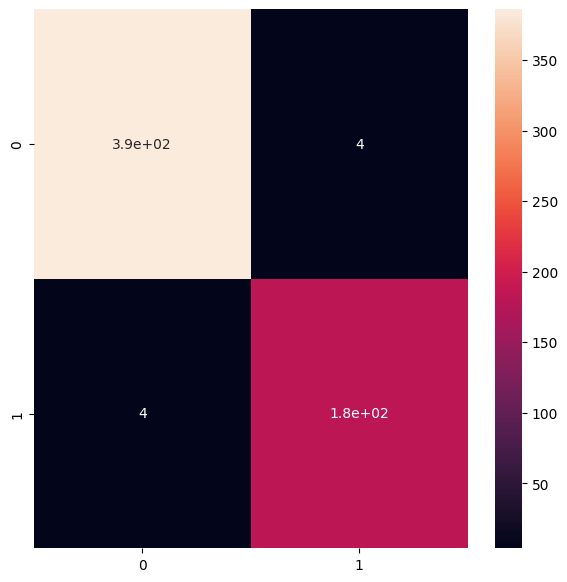

In [20]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True,)

MINI CHALLENGE #6:
- Print out the classification report and comment on the precision, recall and F1-score results

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RESUNET MODELS

![alt text](https://drive.google.com/uc?id=1WOmTUGT_3oN_ltzWlq9ofsw9E1eJwfwH)

![alt text](https://drive.google.com/uc?id=10XpINWmLDApPhIjxq_o8aTbeRjXIQRTD)

![alt text](https://drive.google.com/uc?id=1cVj4egO9bTOMrnkFDn7RhpysF7jjncQT)

![alt text](https://drive.google.com/uc?id=1p4DnLgrWtO8LEoHE1XhPtk00BIuQIJlt)

![alt text](https://drive.google.com/uc?id=1zULGftqTtOQOOY4y0HfkYSZTcHWkEhXT)

# TASK #9: BUILD A SEGMENTATION MODEL TO LOCALIZE TUMOR

In [ ]:
# Get the dataframe containing MRIs which have masks associated with them.
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(0, 3)

In [ ]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

ValueError: With n_samples=0, test_size=0.15 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# create separate list for imageId, classId to pass into the generator

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [ ]:
# Utilities file contains the code for custom loss function and custom data generator
from utilities import DataGenerator

# create image generators

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

In [ ]:
def resblock(X, f):


  # make a copy of input
  X_copy = X

  # main path
  # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Short path
  # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
# function to upscale and concatenate the values passsed
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [ ]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )


MINI CHALLENGE #7:
- print out the segmentation model summary and list the total number of trainable parameters

In [ ]:
model_seg.summary()

# TASK #10: TRAIN A SEGMENTATION RESUNET MODEL TO LOCALIZE TUMOR

## Loss function:

We need a custom loss function to train this ResUNet.So,  we have used the loss function as it is from https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py


@article{focal-unet,
  title={A novel Focal Tversky loss function with improved Attention U-Net for lesion segmentation},
  author={Abraham, Nabila and Khan, Naimul Mefraz},
  journal={arXiv preprint arXiv:1810.07842},
  year={2018}
}

In [ ]:
# Utilities file contains the code for custom loss function and custom data generator

from utilities import focal_tversky, tversky_loss, tversky

In [ ]:
# Compile the model
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model_seg.fit(training_generator, epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

In [ ]:
# save the model architecture to json file for future use

model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

# TASK #11: ASSESS TRAINED SEGMENTATION RESUNET MODEL PERFORMANCE

In [ ]:
from utilities import focal_tversky, tversky_loss, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [ ]:
# Utilities file contains the code for custom loss function and custom data generator
from utilities import prediction

# making prediction
image_id, mask, has_mask = prediction(test, model, model_seg)

In [ ]:
# creating a dataframe for the result
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

In [ ]:
# Merge the dataframe containing predicted results with the original test data.
df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()

In [ ]:
count = 0
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 10:
    # read the images and convert them to RGB format
    img = io.imread(df_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtain the mask for the image
    mask = io.imread(df_pred.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Obtain the predicted mask for the image
    predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("AI Predicted Mask")
    axs[count][2].imshow(predicted_mask)

    # Apply the mask to the image 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI with Original Mask (Ground Truth)")
    axs[count][3].imshow(img)

    img_ = io.imread(df_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with AI Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()

MINI CHALLENGE:
- Plot 30 images along with their corresponding mask
- Visually verify that model predictions made sense

# EXCELLENT JOB! NOW YOU KNOW HOW TO APPLY AI TO DETECT AND LOCALIZE BRAIN TUMORS. THIS IS A GREAT ACHIEVEMENT IN HEALTHCARE.

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Obtain the number of images with mask
brain_df['mask'].value_counts()

MINI CHALLENGE #2

In [ ]:
# Advanced Visualization: visualize the MRI scans along with their mask on one image
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # read the images
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # obtain the mask for the image
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # replace the values in the image with red color (255,0,0) if any mask pixel in the mask was = 255
    img[mask == 255] = (255,0,0)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()

MINI CHALLENGE #3:

- An ensemble of these residual nets achieves 3.57% error
on the ImageNet test set.
- Solution (great article by Siddharth Das): https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

MINI CHALLENGE #4:
- Negative Transfer occurs when transfer learning negatively affect the model. This occurs when the features of old and new tasks are not related.  
- Transfer bounds: Measuring the amount of knowledge transfered is crucial to ensure model quality and robustness.

MINI CHALLENGE #5:

In [ ]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
# Total parameters (original model) = 25,685,634
# Total parameters (New model with added dense and dropout layers) = 25,751,426

MINI CHALLENGE #6:

In [ ]:

from sklearn.metrics import classification_report

report = classification_report(original,predict, labels = [0,1])
print(report)

MINI CHALLENGE #7:


- Total params: 1,210,513

MINI CHALLENGE #8:

In [ ]:
count = 0
fig, axs = plt.subplots(30, 5, figsize=(60, 100))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 30: